# **SENTIMENT ANALYSIS ON CLOTH REVIEWS**

In [1]:
# Load the required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
# Load the dataset from local drive (kaggle dataset)

data = pd.read_csv(r"/content/drive/MyDrive/MY PROJECTS/Amazon cloth reviews/data_amazon.xlsx - Sheet1.csv")
data.head()

,Title,Review,Cons_rating,Cloth_class,Materials,Construction,Color,Finishing,Durability
0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,Intimates,0.0,0.0,0.0,1.0,0.0
1,NaN,Love this dress! it's sooo pretty. i happene...,5.0,Dresses,0.0,1.0,0.0,0.0,0.0
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses,0.0,0.0,0.0,1.0,0.0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants,0.0,0.0,0.0,0.0,0.0
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses,0.0,1.0,0.0,0.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49338 entries, 0 to 49337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         45370 non-null  object 
 1   Review        48507 non-null  object 
 2   Cons_rating   49124 non-null  float64
 3   Cloth_class   49322 non-null  object 
 4   Materials     5741 non-null   float64
 5   Construction  5743 non-null   float64
 6   Color         5742 non-null   float64
 7   Finishing     5737 non-null   float64
 8   Durability    5734 non-null   float64
dtypes: float64(6), object(3)
memory usage: 3.4+ MB


In [3]:
# Basic informations

data.dtypes

Title            object
Review           object
Cons_rating     float64
Cloth_class      object
Materials       float64
Construction    float64
Color           float64
Finishing       float64
Durability      float64
dtype: object

In [4]:
# descriptive statistics

data.describe()

,Cons_rating,Materials,Construction,Color,Finishing,Durability
count,49124.000000,5741.000000,5743.000000,5742.000000,5737.000000,5734.000000
mean,4.099463,0.306567,0.504092,0.259840,0.265818,0.214161
std,1.283707,0.474515,0.500375,0.452657,0.441807,0.425305
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,5.000000,9.000000,2.000000,9.000000,1.000000,9.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49338 entries, 0 to 49337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         45370 non-null  object 
 1   Review        48507 non-null  object 
 2   Cons_rating   49124 non-null  float64
 3   Cloth_class   49322 non-null  object 
 4   Materials     5741 non-null   float64
 5   Construction  5743 non-null   float64
 6   Color         5742 non-null   float64
 7   Finishing     5737 non-null   float64
 8   Durability    5734 non-null   float64
dtypes: float64(6), object(3)
memory usage: 3.4+ MB


In [7]:
data.shape

(49338, 9)

In [8]:
# Checking null values present or not
data.isnull().sum()

Title            3968
Review            831
Cons_rating       214
Cloth_class        16
Materials       43597
Construction    43595
Color           43596
Finishing       43601
Durability      43604
dtype: int64

In [12]:
# AutoEDA

import sweetviz

my_report = sweetviz.analyze(data)
my_report.show_html('/content/drive/MyDrive/MY PROJECTS/Amazon cloth reviews/my_analysis_report.html')


                                             |          | [  0%]   00:00 -> (? left)

Report /content/drive/MyDrive/MY PROJECTS/Amazon cloth reviews/my_analysis_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
# Remove the null values in review column only, we consider review column only for sentiment analysis

review = data.dropna(subset = ['Review'])

In [14]:
review.shape

(48507, 9)

In [15]:
review.head()

,Title,Review,Cons_rating,Cloth_class,Materials,Construction,Color,Finishing,Durability
0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,Intimates,0.0,0.0,0.0,1.0,0.0
1,NaN,Love this dress! it's sooo pretty. i happene...,5.0,Dresses,0.0,1.0,0.0,0.0,0.0
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses,0.0,0.0,0.0,1.0,0.0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants,0.0,0.0,0.0,0.0,0.0
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses,0.0,1.0,0.0,0.0,0.0


In [16]:
# Checking whether duplicates present or not.

review.duplicated().sum()

400

In [17]:
# Drop the duplicates values

review = review.drop_duplicates()

In [18]:
review.head()

,Title,Review,Cons_rating,Cloth_class,Materials,Construction,Color,Finishing,Durability
0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,Intimates,0.0,0.0,0.0,1.0,0.0
1,NaN,Love this dress! it's sooo pretty. i happene...,5.0,Dresses,0.0,1.0,0.0,0.0,0.0
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses,0.0,0.0,0.0,1.0,0.0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants,0.0,0.0,0.0,0.0,0.0
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses,0.0,1.0,0.0,0.0,0.0


# **DATA PREPROCESSING AND EDA**

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
stop_words = set(stopwords.words('english'))

In [22]:
# Function to preprocess text

def preprocess(text):
  # Tokenize the text
  tokens = word_tokenize(text)
  # Remove the stop words
  filtered_tokens = [ i for i in tokens if i.lower() not in stop_words and i.isalnum()]
  return' '.join(filtered_tokens)

In [23]:
review['clean_text'] = review['Review'].apply(preprocess)

In [24]:
review.head()

,Title,Review,Cons_rating,Cloth_class,Materials,Construction,Color,Finishing,Durability,clean_text
0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,Intimates,0.0,0.0,0.0,1.0,0.0,Absolutely wonderful silky sexy comfortable
1,NaN,Love this dress! it's sooo pretty. i happene...,5.0,Dresses,0.0,1.0,0.0,0.0,0.0,Love dress sooo pretty happened find store gla...
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses,0.0,0.0,0.0,1.0,0.0,high hopes dress really wanted work initially ...
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants,0.0,0.0,0.0,0.0,0.0,love love love jumpsuit fun flirty fabulous ev...
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses,0.0,1.0,0.0,0.0,0.0,shirt flattering due adjustable front tie perf...


### **Using Pretrained model for sentiment labeling**

In [25]:
# Download the vader lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [26]:
# Initialyze the vader sentiment analyze
sia = SentimentIntensityAnalyzer()

In [27]:
# Find polarity score

def get_polarity_score(text):
  sentiment_score = sia.polarity_scores(text)
  polarity_score = sentiment_score['compound']
  return polarity_score

In [28]:
review['polarity_score'] = review['clean_text'].apply(get_polarity_score)

In [29]:
review.head()

,Title,Review,Cons_rating,Cloth_class,Materials,Construction,Color,Finishing,Durability,clean_text,polarity_score
0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,Intimates,0.0,0.0,0.0,1.0,0.0,Absolutely wonderful silky sexy comfortable,0.8991
1,NaN,Love this dress! it's sooo pretty. i happene...,5.0,Dresses,0.0,1.0,0.0,0.0,0.0,Love dress sooo pretty happened find store gla...,0.9710
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses,0.0,0.0,0.0,1.0,0.0,high hopes dress really wanted work initially ...,0.8779
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants,0.0,0.0,0.0,0.0,0.0,love love love jumpsuit fun flirty fabulous ev...,0.9464
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses,0.0,1.0,0.0,0.0,0.0,shirt flattering due adjustable front tie perf...,0.9062


In [30]:
def get_sentiment(text):
  sentiment_score = sia.polarity_scores(text)
  if sentiment_score['compound'] >= 0.05:
    return 'positive'
  elif sentiment_score['compound'] <= -0.05:
    return 'negative'
  else:
    return 'neutral'

In [31]:
# Now find sentiment for this cleaned review
review['sentiment'] = review['clean_text'].apply(get_sentiment)

In [32]:
review['sentiment'].value_counts()

sentiment
positive    42346
neutral      3516
negative     2245
Name: count, dtype: int64

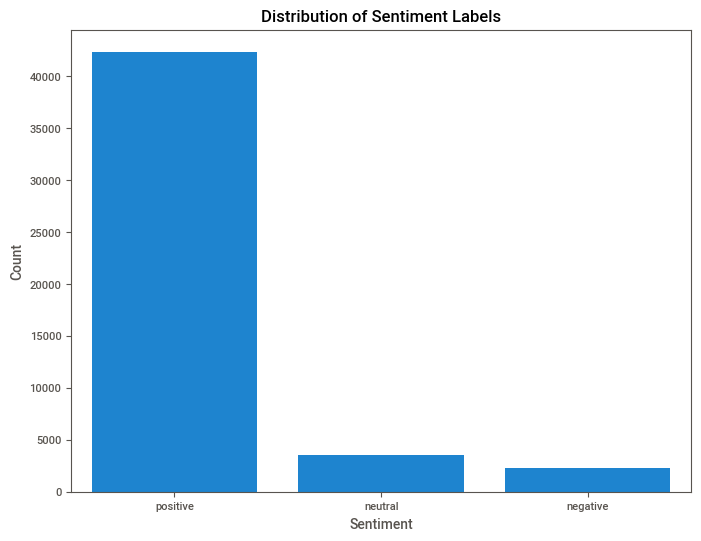

In [33]:
# Distribution of Sentiment Labels
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data = review, order=['positive', 'neutral', 'negative'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

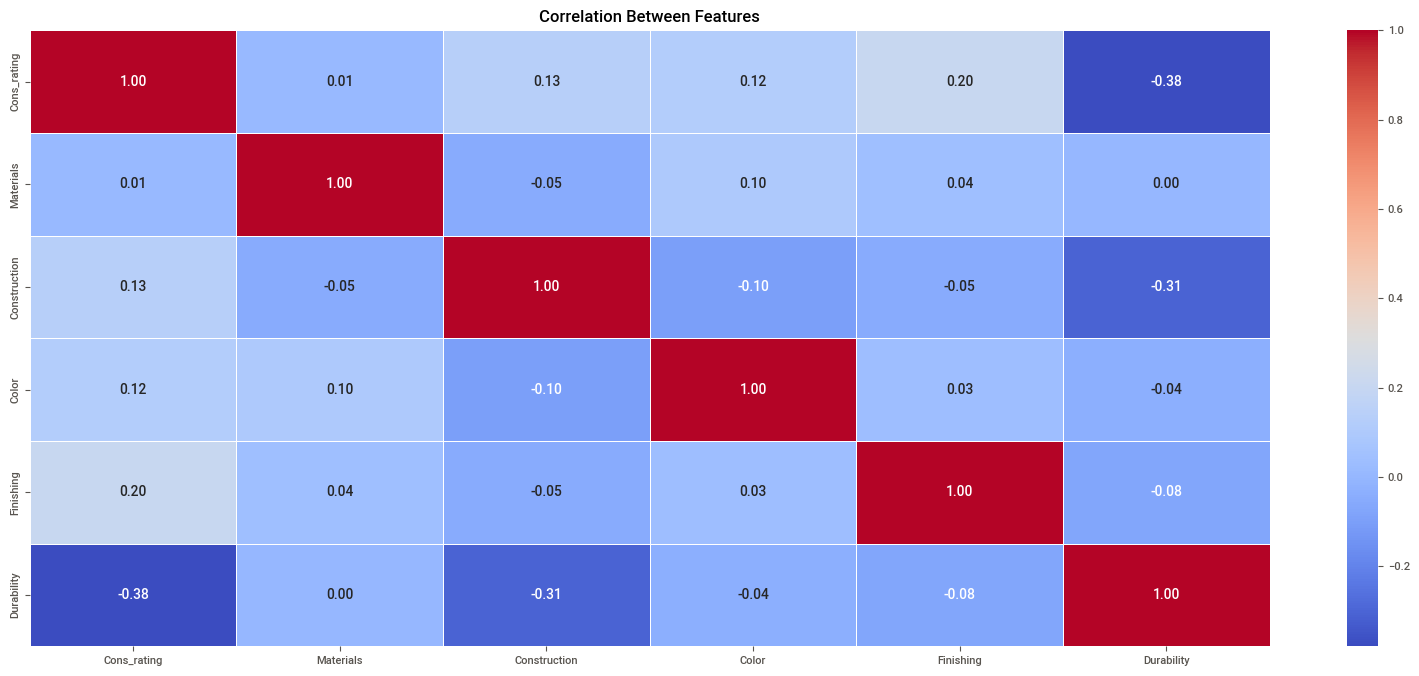

In [34]:
# Correlation Between Features
numerical_features = ['Cons_rating', 'Materials', 'Construction', 'Color', 'Finishing', 'Durability']
correlation_matrix = review[numerical_features].corr()

plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Features')
plt.show()

In [35]:
# Categorical features
review['Cloth_class'].value_counts()

Cloth_class
Dresses           8416
Blouses           5293
Knits             4626
Jeans             3819
Sweaters          3803
Pants             3629
Jackets           3194
Shorts            3071
Sleep             2909
Shirts            2543
Blazer            1620
Suits             1313
Fine gauge        1059
Skirts             903
Lounge             668
Swim               330
Outerwear          319
Legwear            158
Intimates          147
Layering           132
Trend              118
Dress               22
Chemises             1
Casual bottoms       1
Name: count, dtype: int64

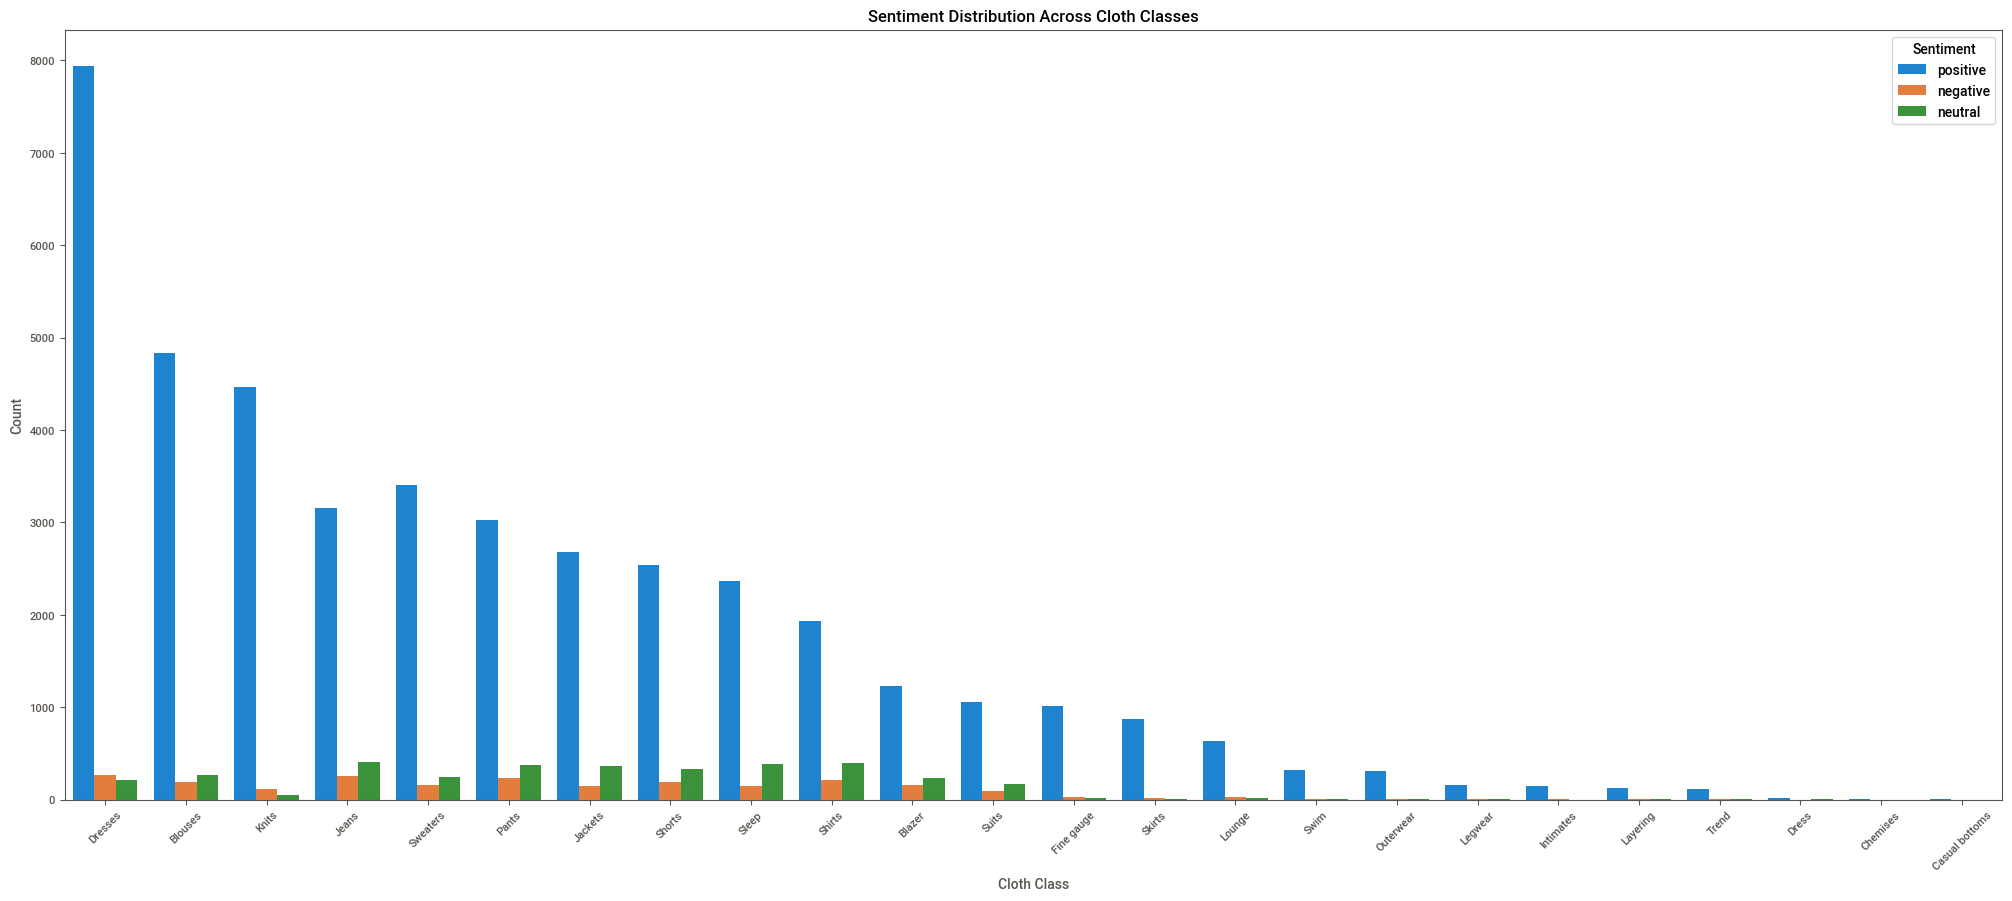

In [36]:
# Sentiment by Category
# Plot sentiment distribution across cloth classes using a grouped bar plot
plt.figure(figsize=(25, 10))
sns.countplot(x='Cloth_class', hue='sentiment', data=review, order=review['Cloth_class'].value_counts().index)
plt.title('Sentiment Distribution Across Cloth Classes')
plt.xlabel('Cloth Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

In [37]:
# WORD CLOUD FOR BETTER UNDERSTANDING

# A word cloud is a visual representation of text data where the size of each
# word corresponds to its frequency or importance in the text. It's a way to
# quickly and intuitively convey the most prominent words or themes in a body of
# text, making it useful for summarizing content, identifying key topics, and
# creating visually appealing graphics for presentations or reports.

In [38]:
from wordcloud import WordCloud

In [39]:
def generate_wordcloud(text):
  wordcloud = WordCloud(width = 800, height = 600, background_color = 'white').generate(text)
  plt.figure(figsize = (10,8))
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis("off")
  plt.show()

In [40]:
positive_rev = ' '.join(review[review['sentiment'] == 'positive']['clean_text'])

In [41]:
negative_rev = ' '.join(review[review['sentiment'] == 'negative']['clean_text'])

In [42]:
neutral_rev = ' '.join(review[review['sentiment'] == 'neutral']['clean_text'])

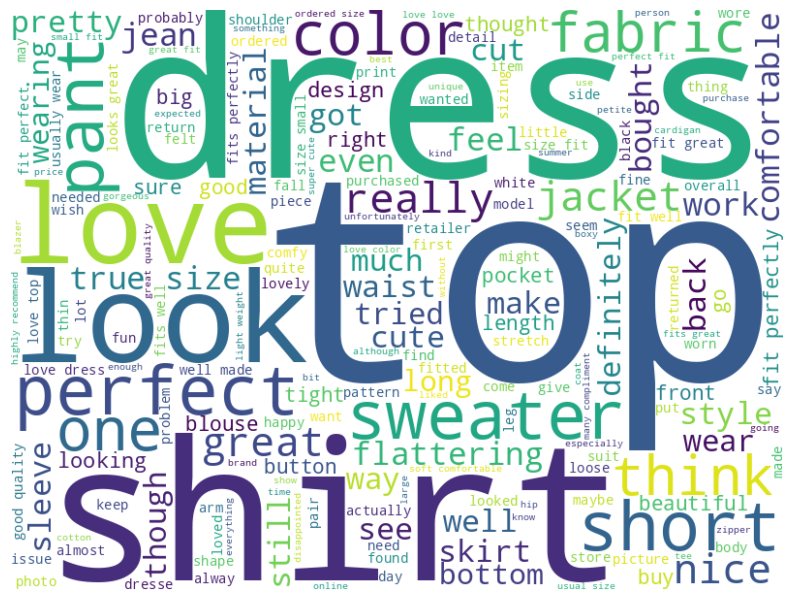

None


In [43]:
print(generate_wordcloud(positive_rev))

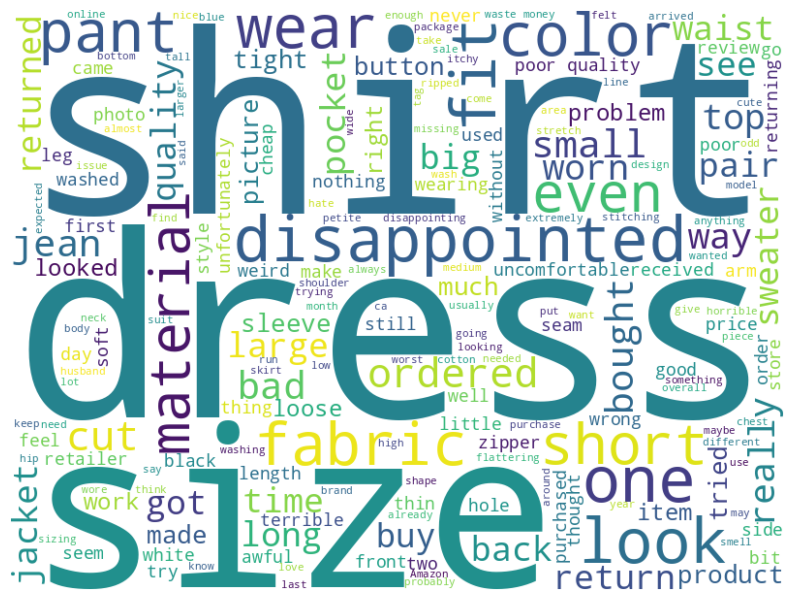

None


In [44]:
print(generate_wordcloud(negative_rev))

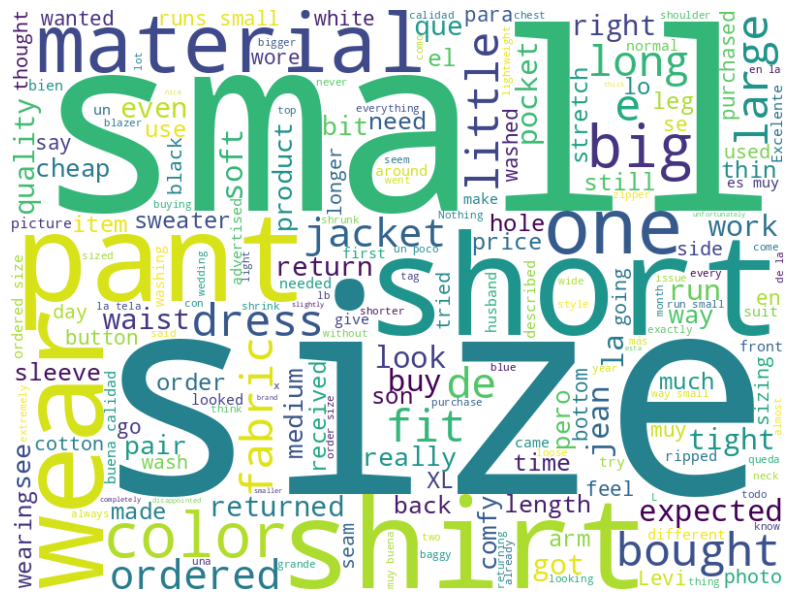

None


In [45]:
print(generate_wordcloud(neutral_rev))

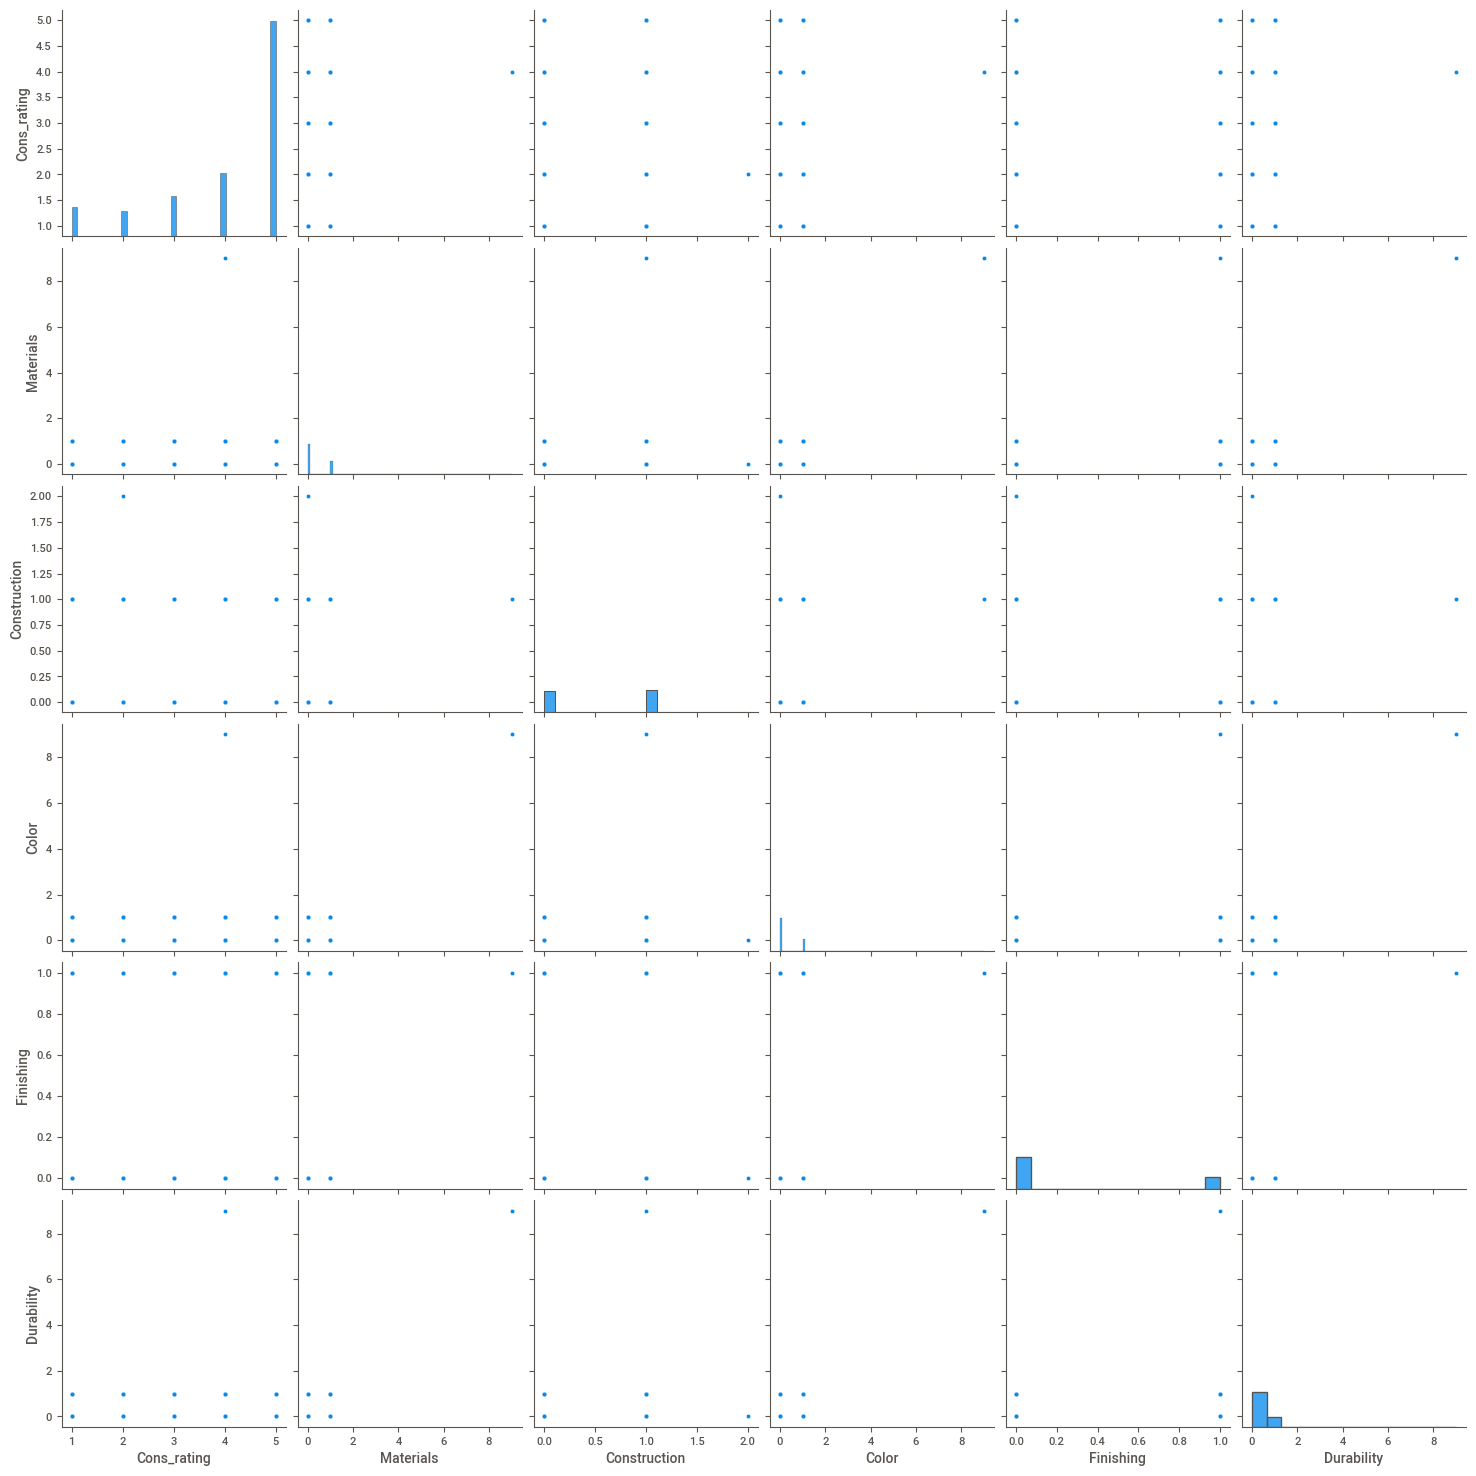

In [46]:
# Select numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64'])

# Plot pair plots for numerical columns
sns.pairplot(numerical_columns)
plt.show()


In [47]:
# TOPIC MODELING

# Topic modeling is a technique used in natural language processing (NLP) to
# discover abstract topics or themes from a collection of documents. In short,
# it's a way to automatically identify the main themes or topics present in a
# large corpus of text data.

In [48]:
document = review['clean_text'].tolist()

In [49]:
vectorizer = CountVectorizer(max_df = 0.8, min_df = 2, stop_words = 'english')

In [50]:
# document term matrix
dtm = vectorizer.fit_transform(document)

In [51]:
# Number of topics
num_topics = 5
lda_model = LatentDirichletAllocation(n_components = num_topics,random_state = 42)

In [52]:
lda_model.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [53]:
# Display topics and top words for each topic
for index, topic in enumerate(lda_model.components_):
    print(f'Topic {index + 1}:')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topic 1:
['material', 'price', 'quality', 'sweater', 'cheap', 'coat', 'jacket', 'color', 'fabric', 'like']
Topic 2:
['flattering', 'ordered', 'fabric', 'wear', 'perfect', 'small', 'love', 'fit', 'size', 'dress']
Topic 3:
['long', 'small', 'great', 'size', 'cute', 'look', 'really', 'wear', 'love', 'like']
Topic 4:
['fits', 'shirt', 'nice', 'color', 'good', 'soft', 'love', 'fit', 'comfortable', 'great']
Topic 5:
['wear', 'great', 'waist', 'shorts', 'like', 'pair', 'jeans', 'size', 'pants', 'fit']


In [54]:
# Conclusion

# "The majority of reviews are positive, indicating overall satisfaction with
# the product,service etc. While this suggests a satisfied customer
# base, there are still some negative and neutral reviews, highlighting areas
# for potential improvement and the importance of ongoing monitoring and
# analysis of customer feedback."